In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [26]:
df_eval = pd.read_csv('../data/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [27]:
df_train = pd.read_csv('../data/Training_Set/RFMiD_Training_Labels.csv')

In [28]:
df_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating a different df to store disease risk column for the data

In [29]:
df_disease_risk_train = df_train['Disease_Risk']
df_disease_risk_eval = df_eval['Disease_Risk']

In [30]:
df_train.drop(['Disease_Risk'], axis=1, inplace=True)
df_eval.drop(['Disease_Risk'], axis=1, inplace=True)

In [31]:
df_train.head()

,ID,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_eval.head()

,ID,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
## making ID column as index
df_train.set_index('ID', inplace=True)
df_eval.set_index('ID', inplace=True)

In [34]:
df_train = df_train[['DR', 'MH', 'TSLN', 'ODC']]
df_eval = df_eval[['DR', 'MH', 'TSLN', 'ODC']]

print("shape of train data: ", df_train.shape)
print("shape of eval data: ", df_eval.shape)

shape of train data:  (1920, 4)
shape of eval data:  (640, 4)


In [37]:
## removing the rows which have no diseases
df_train = df_train[df_train.sum(axis=1) != 0]
df_eval = df_eval[df_eval.sum(axis=1) != 0]

In [38]:
print("shape of train data: ", df_train.shape)
print("shape of eval data: ", df_eval.shape)

shape of train data:  (949, 4)
shape of eval data:  (295, 4)


In [39]:
df_train.head()

,DR,MH,TSLN,ODC
ID,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,1
5,1,0,0,0


In [40]:
df_eval.head()

,DR,MH,TSLN,ODC
ID,,,,
1,1,0,1,0
11,1,0,0,0
12,1,0,0,0
20,1,0,0,0
23,0,0,1,0


In [41]:
## adding the disease risk column to the train and eval data with ID as index
df_train['Disease_Risk'] = df_disease_risk_train
df_eval['Disease_Risk'] = df_disease_risk_eval

Im encode the image data,
Subsampling the data. 

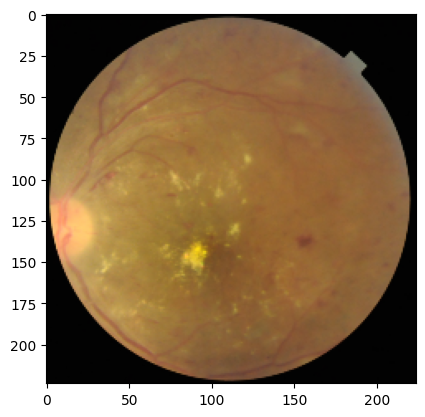

In [39]:
## opening an image and converting it to numpy array
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/Users/rishabhsharma/Documents/GitHub/rfmd/data/Training_Set/Training/1.png')
img1 = img
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## cropping the sides of the image
img = img[5:img.shape[0]-5, 360:img.shape[1]-360]
## normalizing the image
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
## pyrdown the image
img = cv2.pyrDown(img)
## resizing the image to 224x224x3
img = cv2.resize(img, (224, 224))
## converting the image to grayscale
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)
plt.show()

In [38]:
## size of the image in mb after preprocessing
import sys
print(sys.getsizeof(img)/1000000)

0.602256
